Education Investment Analysis

This notebook analyzes education investment data across EU countries, including:
1. Investment trends analysis
2. Economic indicators correlation
3. Policy impact assessment
4. Investment efficiency evaluation

In [1]:
# Import required libraries
import sys
import os
import json
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import matplotlib

In [2]:
# Load environment variables from .env file
load_dotenv(Path('..').resolve() / '.env')

True

In [3]:
# Add project root to Python path
project_root = Path('..').resolve()
sys.path.append(str(project_root))

In [4]:
# Import project modules
from src.data_processing.db_manager import DatabaseManager
from src.data_processing.data_cleaner import DataCleaner
from src.data_collection.eurostat_collector import EurostatCollector

In [5]:
# Set plotting style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [6]:
# Step 1: Data Collection and Database Connection
print("Step 1: Data Collection")
print("-" * 50)

Step 1: Data Collection
--------------------------------------------------


In [7]:
# Initialize data collectors and managers
collector = EurostatCollector()
db_manager = DatabaseManager()
cleaner = DataCleaner()

In [8]:
# Collect fresh data from sources
print("\nCollecting education investment data...")
education_data_raw = collector.get_education_investment_data()
print(f"Collected {len(education_data_raw)} education investment records")

2024-12-19 15:46:30,436 - INFO - Getting education investment data...
2024-12-19 15:46:30,440 - INFO - Using cached education investment data



Collected 2585 education investment records


In [9]:
print("\nCollecting economic indicators...")
economic_data_raw = collector.get_economic_indicators()
print(f"Collected {len(economic_data_raw)} economic indicator records")

2024-12-19 15:46:30,443 - INFO - Getting economic indicators data...
2024-12-19 15:46:30,445 - INFO - Using cached economic indicators data



Collected 378 economic indicator records



Collected 378 economic indicator records


In [10]:
print("\nCollecting education policies...")
policy_docs = collector.get_education_policies()
print(f"Collected {len(policy_docs)} policy documents")

2024-12-19 15:46:30,447 - INFO - Getting education policy documents...



Collected 1 policy documents


In [11]:
# Step 2: Database Operations
print("\nStep 2: Data Storage")
print("-" * 50)


Step 2: Data Storage
--------------------------------------------------


In [12]:
# Connect to databases
print("\nConnecting to databases...")
try:
    db_manager.connect_postgres()
    print("Successfully connected to PostgreSQL")
except Exception as e:
    print(f"Error connecting to PostgreSQL: {str(e)}")
    print("Cannot proceed without PostgreSQL connection")
    sys.exit(1)


Connecting to databases...


2024-12-19 15:46:34,080 - INFO - Successfully connected to PostgreSQL


Successfully connected to PostgreSQL


In [13]:
try:
    db_manager.connect_mongo()
    print("Successfully connected to MongoDB")
except Exception as e:
    print(f"Warning: MongoDB connection failed: {str(e)}")
    print("Continuing without MongoDB...")

2024-12-19 15:46:34,086 - INFO - Attempting to connect to MongoDB at 47.91.31.227:27017
2024-12-19 15:46:35,609 - INFO - Successfully connected to MongoDB


Successfully connected to MongoDB


Successfully connected to MongoDB


In [14]:
# Create necessary database tables
print("\nSetting up database tables...")
try:
    db_manager.create_tables()
    print("Successfully set up PostgreSQL tables")
except Exception as e:
    print(f"Error setting up tables: {str(e)}")
    sys.exit(1)


Setting up database tables...


2024-12-19 15:46:38,464 - INFO - Tables created successfully


Successfully set up PostgreSQL tables


In [15]:
# Save collected data to databases
print("\nSaving data to PostgreSQL...")
try:
    db_manager.insert_education_data(education_data_raw)
    db_manager.insert_economic_data(economic_data_raw)
    print("Successfully saved data to PostgreSQL")
except Exception as e:
    print(f"Error saving to PostgreSQL: {str(e)}")
    sys.exit(1)


Saving data to PostgreSQL...


2024-12-19 15:46:40,891 - INFO - Saved batch 1 (1000 rows)
2024-12-19 15:46:42,239 - INFO - Saved batch 2 (1000 rows)
2024-12-19 15:46:43,322 - INFO - Saved batch 3 (1000 rows)
2024-12-19 15:46:44,405 - INFO - Saved batch 4 (1000 rows)
2024-12-19 15:46:45,493 - INFO - Saved batch 5 (1000 rows)
2024-12-19 15:46:46,610 - INFO - Saved batch 6 (1000 rows)
2024-12-19 15:46:47,694 - INFO - Saved batch 7 (1000 rows)
2024-12-19 15:46:48,791 - INFO - Saved batch 8 (1000 rows)
2024-12-19 15:46:50,330 - INFO - Saved batch 9 (1000 rows)
2024-12-19 15:46:51,898 - INFO - Saved batch 10 (1000 rows)
2024-12-19 15:46:53,023 - INFO - Saved batch 11 (1000 rows)
2024-12-19 15:46:54,124 - INFO - Saved batch 12 (1000 rows)
2024-12-19 15:46:55,203 - INFO - Saved batch 13 (1000 rows)
2024-12-19 15:46:56,285 - INFO - Saved batch 14 (1000 rows)
2024-12-19 15:46:57,401 - INFO - Saved batch 15 (1000 rows)
2024-12-19 15:46:58,522 - INFO - Saved batch 16 (1000 rows)
2024-12-19 15:46:59,614 - INFO - Saved batch 17 (

Successfully saved data to PostgreSQL


2024-12-16 23:00:07,052 - INFO - Saved batch 5 (1000 rows)


2024-12-16 23:00:08,035 - INFO - Saved batch 6 (1000 rows)


2024-12-16 23:00:09,025 - INFO - Saved batch 7 (1000 rows)


2024-12-16 23:00:10,003 - INFO - Saved batch 8 (1000 rows)


2024-12-16 23:00:10,998 - INFO - Saved batch 9 (1000 rows)


2024-12-16 23:00:11,981 - INFO - Saved batch 10 (1000 rows)


2024-12-16 23:00:12,973 - INFO - Saved batch 11 (1000 rows)


2024-12-16 23:00:13,963 - INFO - Saved batch 12 (1000 rows)


2024-12-16 23:00:14,953 - INFO - Saved batch 13 (1000 rows)


2024-12-16 23:00:15,961 - INFO - Saved batch 14 (1000 rows)


2024-12-16 23:00:16,946 - INFO - Saved batch 15 (1000 rows)


2024-12-16 23:00:17,944 - INFO - Saved batch 16 (1000 rows)


2024-12-16 23:00:18,935 - INFO - Saved batch 17 (1000 rows)


2024-12-16 23:00:19,909 - INFO - Saved batch 18 (756 rows)


2024-12-16 23:00:19,910 - INFO - Successfully saved 17756 rows to education_data


2024-12-16 23:00:19,911 - INFO - Successfully inserted 2585 rows of education data


2024-12-16 23:00:21,574 - INFO - Saved batch 1 (378 rows)


2024-12-16 23:00:21,577 - INFO - Successfully saved 378 rows to economic_data


2024-12-16 23:00:21,578 - INFO - Successfully inserted 378 rows of economic data


Successfully saved data to PostgreSQL


In [16]:
# Save policy documents to MongoDB
print("\nSaving policy documents to MongoDB...")
if db_manager.mongo_db is not None:
    try:
        db_manager.save_to_mongo('education_policies', policy_docs)
        print("Successfully saved policy documents to MongoDB")
    except Exception as e:
        print(f"Warning: Failed to save to MongoDB: {str(e)}")
        print("Continuing without policy data...")
else:
    print("Skipping MongoDB storage as connection is not available")


Saving policy documents to MongoDB...


2024-12-19 15:47:02,841 - INFO - Successfully saved 1 documents to education_policies


Successfully saved policy documents to MongoDB


In [17]:
# Step 3: Data Retrieval and Analysis
print("\nStep 3: Data Analysis")
print("-" * 50)


Step 3: Data Analysis
--------------------------------------------------


In [18]:
# Retrieve data from databases
print("\nRetrieving data from databases...")
try:
    education_data = db_manager.get_education_data()
    print(f"Retrieved {len(education_data)} education investment records")
    
    economic_data = db_manager.get_economic_data()
    print(f"Retrieved {len(economic_data)} economic indicator records")
except Exception as e:
    print(f"Error retrieving data from PostgreSQL: {str(e)}")
    sys.exit(1)


Retrieving data from databases...


2024-12-19 15:47:38,728 - INFO - Retrieved 17756 rows of education data


Retrieved 17756 education investment records
Retrieved 378 economic indicator records


In [19]:
# Get policy data if available
policy_docs = []
if db_manager.mongo_db is not None:
    try:
        policy_data = db_manager.query_mongo('education_policies')
        policy_docs = list(policy_data)
        print(f"Retrieved {len(policy_docs)} education policy documents")
    except Exception as e:
        print(f"Warning: Could not retrieve MongoDB data: {str(e)}")
        print("Continuing without policy data...")

Retrieved 33 education policy documents


In [20]:
# Clean and prepare data for analysis
education_data_cleaned = cleaner.clean_education_data(education_data)
print(f"\nCleaned education data shape: {education_data_cleaned.shape}")

2024-12-19 15:47:41,346 - INFO - Successfully cleaned education data: 16743 rows remaining



Cleaned education data shape: (16743, 9)


In [21]:
# Analysis 1: Investment Trends in Major EU Countries
print("\nAnalyzing major EU countries...")
major_countries = ['DE', 'FR', 'IT', 'ES', 'PL']
major_country_data = education_data_cleaned[
    education_data_cleaned['geo_time_period'].isin(major_countries)
]


Analyzing major EU countries...


In [22]:
# Country name mapping for better visualization
country_names = {
    'DE': 'Germany',
    'FR': 'France',
    'IT': 'Italy',
    'ES': 'Spain',
    'PL': 'Poland'
}

In [23]:
# Visualization 1: Investment Trends
plt.figure(figsize=(15, 8))
colors = {'DE': 'blue', 'FR': 'red', 'IT': 'green', 'ES': 'orange', 'PL': 'purple'}

<Figure size 1500x800 with 0 Axes>

Plotted data for Germany
Plotted data for France
Plotted data for Italy
Plotted data for Spain
Plotted data for Poland


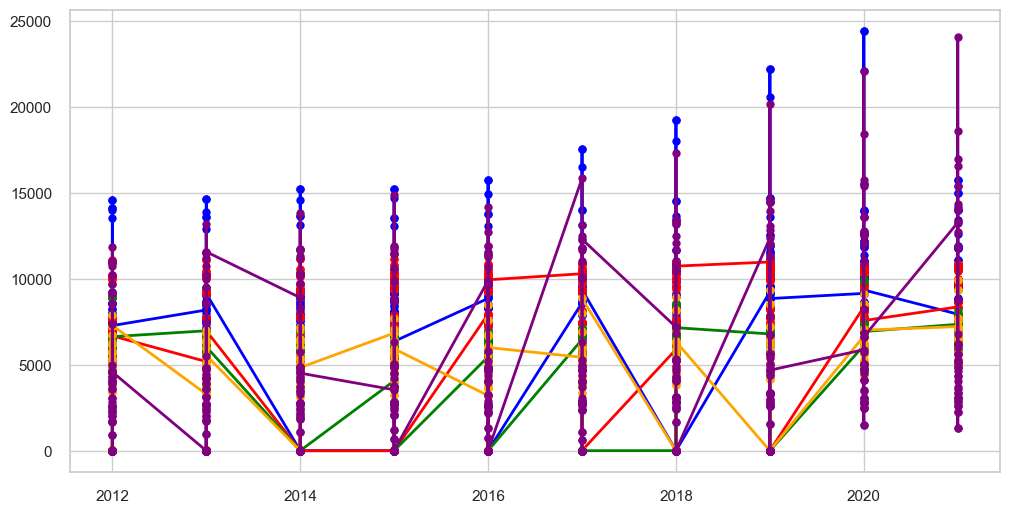

In [24]:
for country in major_countries:
    country_data = major_country_data[major_country_data['geo_time_period'] == country]
    if not country_data.empty:
        country_data = country_data.sort_values('year')
        plt.plot(country_data['year'], 
                country_data['value'], 
                label=country_names[country],
                color=colors[country],
                marker='o',
                linewidth=2)
        print(f"Plotted data for {country_names[country]}")

2024-12-19 15:47:41,629 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


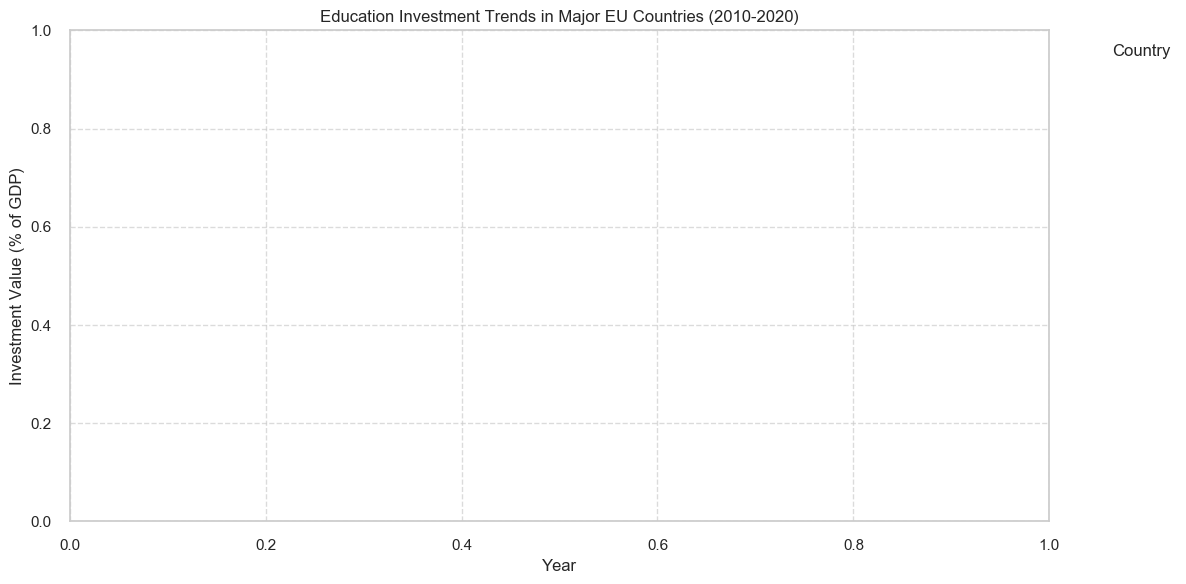

In [25]:
plt.title('Education Investment Trends in Major EU Countries (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Investment Value (% of GDP)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('investment_trends.png', bbox_inches='tight', dpi=300)
plt.show()

In [26]:
# Analysis 2: Calculate CAGR (Compound Annual Growth Rate)
print("\nCompound Annual Growth Rate (CAGR) by Country:")
print("-" * 40)


Compound Annual Growth Rate (CAGR) by Country:
----------------------------------------


In [27]:
cagr_by_country = {}
for country in major_countries:
    country_data = major_country_data[major_country_data['geo_time_period'] == country]
    if len(country_data) >= 2:
        country_data = country_data.sort_values('year')
        first_year = country_data.iloc[0]
        last_year = country_data.iloc[-1]
        years = last_year['year'] - first_year['year']
        if years > 0:
            cagr = (((last_year['value'] / first_year['value']) ** (1/years)) - 1) * 100
            cagr_by_country[country] = cagr
            print(f"{country_names[country]}: {cagr:.2f}%")

Germany: 96.74%
France: 0.87%
Italy: -1.55%
Spain: 95.17%
Poland: -6.19%


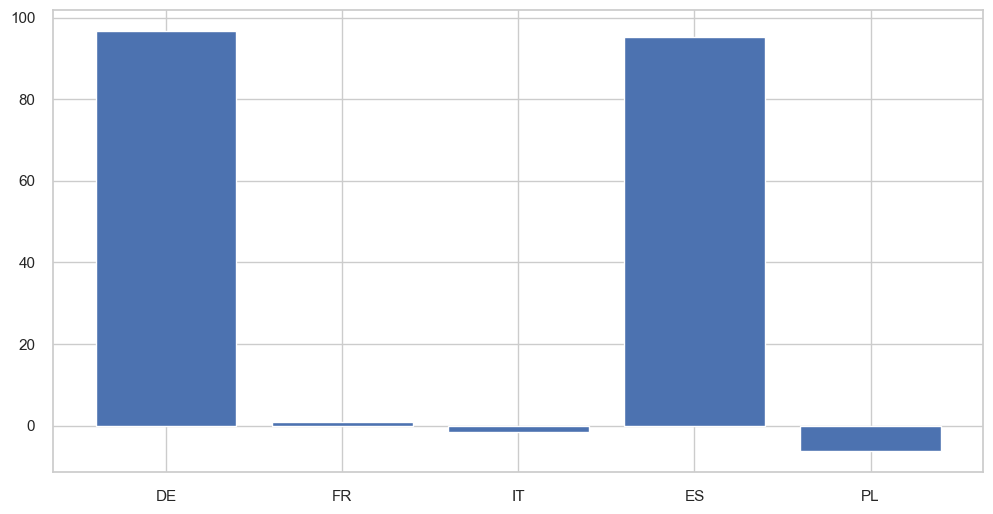

In [28]:
# Visualization 2: CAGR Comparison
plt.figure(figsize=(12, 6))
cagr_df = pd.DataFrame(list(cagr_by_country.items()), columns=['Country', 'CAGR'])
bars = plt.bar(cagr_df['Country'], cagr_df['CAGR'])

In [29]:
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

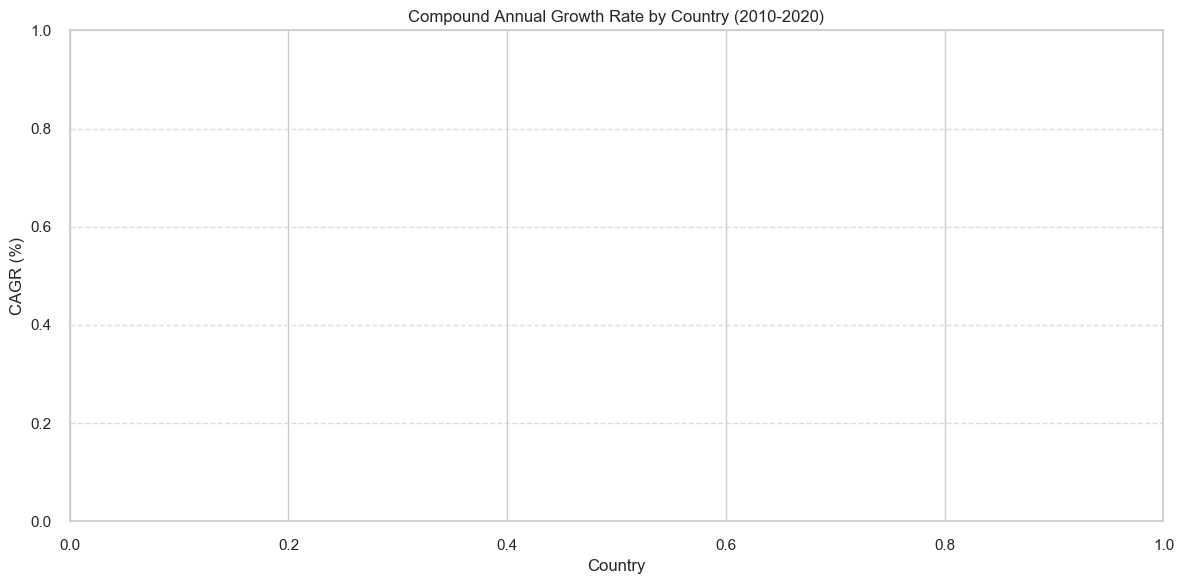

In [30]:
plt.title('Compound Annual Growth Rate by Country (2010-2020)')
plt.xlabel('Country')
plt.ylabel('CAGR (%)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('cagr_by_country.png', dpi=300)
plt.show()

In [31]:
# Analysis 3: Investment Efficiency
print("\nAnalyzing Investment Efficiency...")
print("-" * 40)


Analyzing Investment Efficiency...
----------------------------------------


In [32]:
if not merged_data.empty:
    # Calculate investment efficiency
    merged_data['investment_efficiency'] = merged_data['gdp_per_capita'] / merged_data['value']
    
    # Get top 5 most efficient countries
    latest_year = merged_data['year'].max()
    latest_efficiency = merged_data[merged_data['year'] == latest_year]
    top_efficient = latest_efficiency.nlargest(5, 'investment_efficiency')
    
    # Visualization 3: Investment Efficiency
    plt.figure(figsize=(12, 6))
    bars = plt.bar(top_efficient['geo_time_period'], top_efficient['investment_efficiency'])
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom')
    
    plt.title(f'Top 5 Countries by Investment Efficiency ({latest_year})')
    plt.xlabel('Country')
    plt.ylabel('Efficiency Ratio (GDP per capita / Investment)')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('investment_efficiency.png', dpi=300)
    plt.show()
    
    print("\nTop 5 Countries by Investment Efficiency:")
    for _, row in top_efficient.iterrows():
        print(f"{row['geo_time_period']}: {row['investment_efficiency']:.2f}")

NameError: name 'merged_data' is not defined

In [ ]:
# Step 4: Cleanup
print("\nStep 5: Cleanup")
print("-" * 50)

In [ ]:
# Close database connections
print("\nClosing database connections...")
db_manager.close_connections()

In [ ]:
print("\nAnalysis completed successfully!")